In [9]:
import numpy as np
import matplotlib.pyplot as plt

def plot(f,pointlist, showmin=False, m=[0,0], size=0):
    """Plots the points in pointlist on a countour plot of f:
    f  - target function
    pointlist  - list of points provided by some iterative algorithm
    showmin  - whether or not to show the actual minimum
    m - the location of the actual minimum
    """
    # Setup plot
    plt.figure(figsize=(12,8))
    ax = plt.gca()
    ax.set_aspect(1)
     # Plot points
    xvals = [p[0] for p in pointlist]
    yvals = [p[1] for p in pointlist]
    plt.plot(xvals,yvals,'ro-', linewidth=1.0)

    if showmin:
        plt.plot(m[0],m[1],'kx')
    elif size==0:
        m = pointlist[-1] # to avoid m influencing the range of the plot
     # Add countour plot
    delta = 0.025
    if size == 0:
        x = np.arange(min(xvals + [m[0]])-.5, max(xvals + [m[0]])+.5, delta)
        y = np.arange(min(yvals + [m[1]])-.5, max(yvals + [m[1]])+.5, delta)
    else:
        x = np.arange(-size, size, delta)
        y = np.arange(-size, size, delta)

    X, Y = np.meshgrid(x, y)
    Z = f([X,Y])
    plt.contour(X,Y,Z,30);

In [11]:
from scipy.optimize import minimize # We cheat by loading a built in line search method
def steepest(f,g,init,iterations=3, verbose=False):
    """Steepest descent method:
    f  - target function
    g  - gradient of f
    init  - initial point (as list of coordinates)
    iterations  - how many steps to carry out
    """
    xlist = [init] # list of points, consisting of just the initial point for now
    for i in range(iterations):
    # get the final point in xlist:
        x = xlist[-1]
        # line search in direction of g(x):
        ftilde = lambda a: f(x - a*g(x))
        alpha = minimize(ftilde, [0]).x[0]
        # add new point to xlist:
        xlist += [x - alpha*g(x)]
        # print data if requested:
        if verbose:
            print("x" + str(i) + " = " + str(x))
            print("f" + str(i) + " = " + str(f(x)))
            print("gradient" + str(i) + " = " + str(g(x)))
            print("alpha = " + str(alpha))
            print("")
            # print final point if requested:
    if verbose:
        print("x" + str(i+1) + " = " + str(xlist[-1]))
        # output the list of all iterates:
    return xlist


In [12]:
# Specify function, gradient, and initial point
f = lambda x: x[0] + x[0]**2 - x[0]**3 + x[1]**2
g = lambda x: np.array([1 + 2*x[0] - 3*x[0]**2, 2*x[1]])
init = [.5,1.]
# Calculate points of iteration
pointlist = steepest(f,g,init, verbose=True)

x0 = [0.5, 1.0]
f0 = 1.625
gradient0 = [1.25 2.  ]
alpha = 0.5691927231223695

x1 = [-0.2114909  -0.13838545]
f1 = -0.1381523194760775
gradient1 = [ 0.44283298 -0.27677089]
alpha = 0.31151680161690054

x2 = [-0.34944082 -0.05216666]
f2 = -0.18194074315863318
gradient2 = [-0.0652083  -0.10433333]
alpha = 0.3894745313789651

x3 = [-0.32404385 -0.01153149]


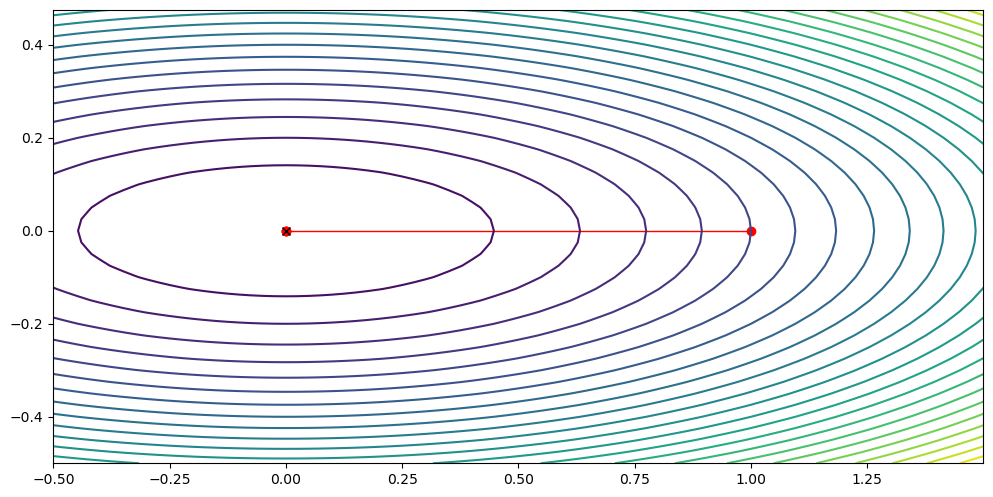

In [13]:
# A simple quadratic function
f = lambda x: x[0]**2 + 10*x[1]**2
g = lambda x: np.array([2*x[0], 20*x[1]])
init = np.array([1,0])
pointlist = steepest(f,g,init)
plot(f,pointlist, showmin=True)

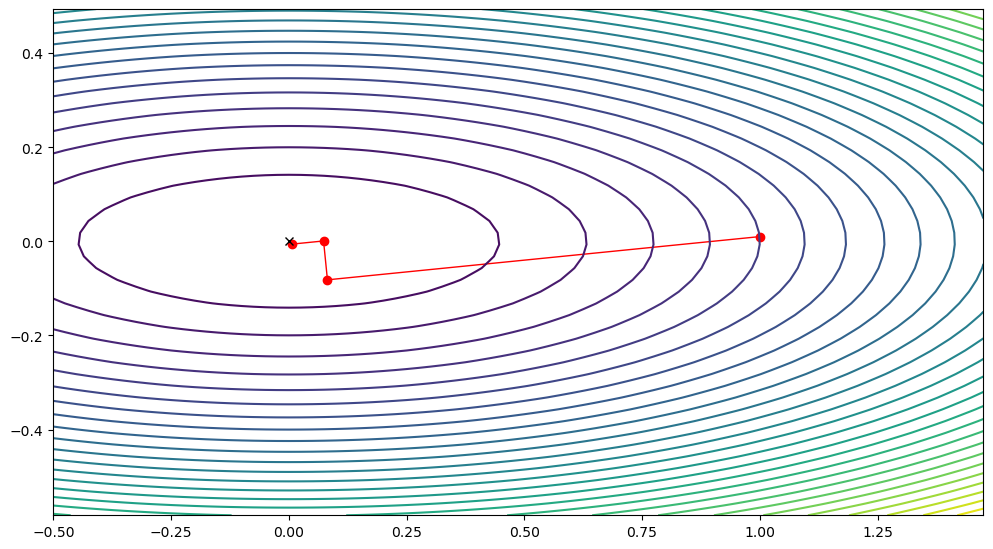

In [14]:
# Same function, slightly different initial point
init = np.array([1,.01])
pointlist = steepest(f,g,init)
plot(f,pointlist, showmin=True)


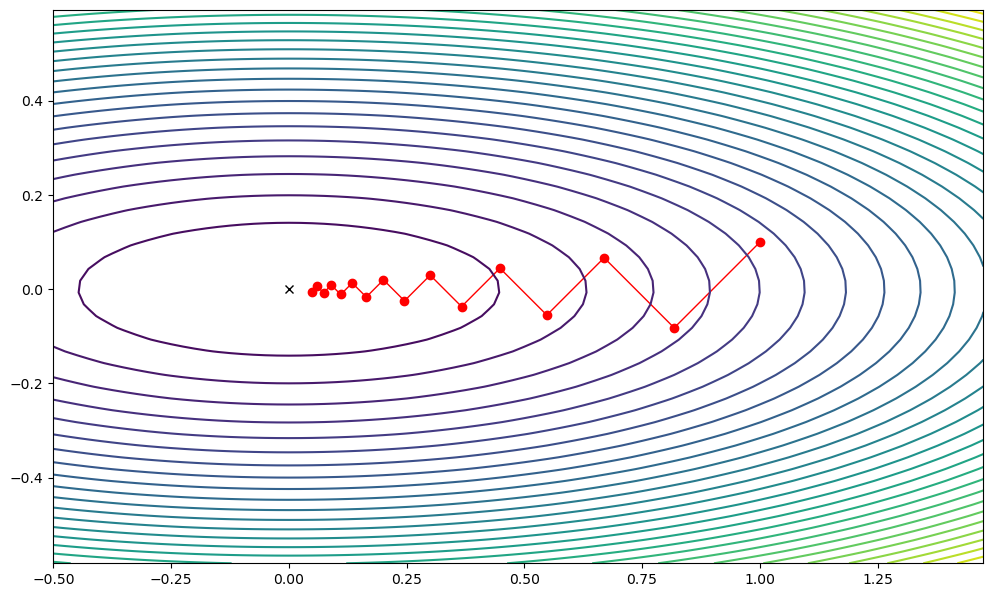

In [15]:
# Same function, worst case initial point
init = np.array([1,.1])
pointlist = steepest(f,g,init,iterations=15)
plot(f,pointlist, showmin=True)

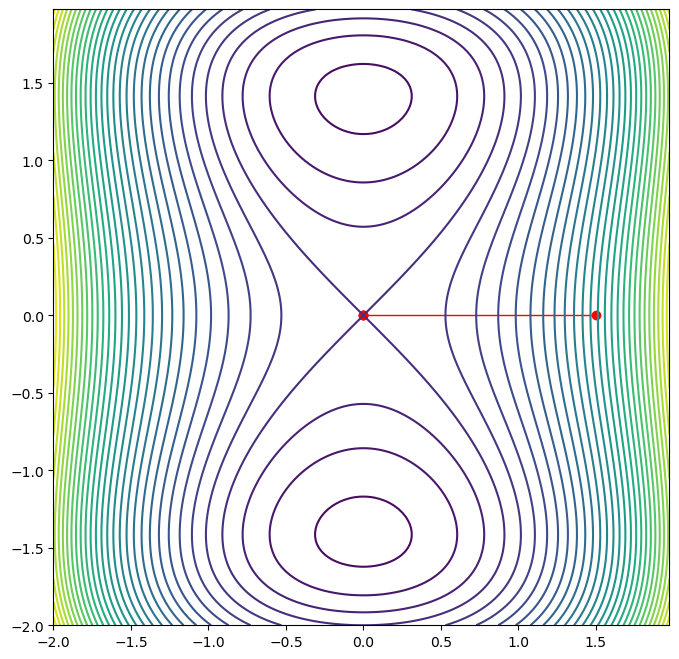

In [16]:
# Iteration can get stuck at a saddle point
f = lambda x: x[0]**2 - x[1]**2 + .25*x[0]**4 + .25*x[1]**4
g = lambda x: np.array([2*x[0] + x[0]**3, -2*x[1]] + x[1]**3 )
init = np.array([1.5,0])
pointlist = steepest(f,g,init)
plot(f,pointlist, size = 2)